# SDSS DR14 Data Classification with Neural Networks

## **Introduction:**
This notebook demonstrates how to build a neural network model to classify astronomical objects from sample data from the SDSS DR14.
The goal is to predict the 'class' of an object, as ethier a `STAR`, `GALAXY` or `QSO`, based on its features like `ra`, `dec`, `u`, `g`, `r`, `i` and `z`.

## **Data Loading and Exploration:**

Load the dataset using the `pandas` libary

In [38]:
import pandas as pd
#data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")

#Google Drive link
url = "https://drive.google.com/uc?id=1Pfii448H__H0qa644YhTKUG68Z8VmxLv"

# Load the CSV file
data = pd.read_csv(url)

          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  549

The first few rows of the dataset can be displayed using `.head`

In [39]:
display(data.head())

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


The data's structure and summary statistics can be explored using `.info` and `.describe`

In [40]:
data.info()
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


## **Feature Selection and Target Variable:**
We will only use the following features for classification:
- `ra`: Right ascension
- `dec`: Declination
- `u`, `g`, `r`, `i`, `z`: Magnitudes in different photometric bands

We define a new varible `X` which is the dataset cut to only include these features

The target column, `class`, that represents the type of astronomical object is set to a new varible `Y`.


In [41]:
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z']
target = 'class'

X = data[features]
Y = data[target]

## **Data Preprocessing:**

## **Encoding the Target Variable:**
The target variable 'class' is categorical. We need to encode it into numerical values using LabelEncoder.

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(Y)
print(f"Classes encoded: {encoder.classes_}")

Classes encoded: ['GALAXY' 'QSO' 'STAR']


## **Data Splitting:**

We split the data into training and testing sets so that the decison tree model performance is evaluated on unseen data.
- 80% of the data is used for model training.
- 20% of the data is used for model testing.
- `random_state` ensures reproducibility.

We use the `sklearn.model_selection` module to slit the data set into training and testing subsets. Where `test_size=0.2` specifies the proportion of the dataset to include in the test split and `random_state=42` sets and arbitrary seed value used to initialize the random number generator used to slipt the dataset in a reproducible way.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Building the Neural Network Model:**
We will use the Keras library to build a sequential neural network model.

In [44]:
#import os
#os.system('pip install tensorflow')
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 34.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 60.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 59.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


2025-01-16 12:05:20.934810: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 12:05:20.938117: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-16 12:05:20.946167: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737029120.960819     627 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737029120.965113     627 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-16 12:05:20.982376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

Build the neural network model

In [45]:
nn_model = Sequential()

Input layer + First hidden layer with ReLU activation and 64 neurons

In [46]:
nn_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
print("Added first hidden layer with 64 neurons and ReLU activation.")

Added first hidden layer with 64 neurons and ReLU activation.


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-16 12:05:22.664362: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Add a dropout layer to reduce overfitting (drop 20% of neurons during training)

In [47]:
nn_model.add(Dropout(0.2))
print("Added Dropout layer with 0.2 rate to prevent overfitting.")

Added Dropout layer with 0.2 rate to prevent overfitting.


Second hidden layer with 32 neurons and ReLU activation

In [48]:
nn_model.add(Dense(32, activation='relu'))
print("Added second hidden layer with 32 neurons and ReLU activation.")

Added second hidden layer with 32 neurons and ReLU activation.


Output layer with softmax activation for multi-class classification

In [49]:
nn_model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer
print("Added output layer with softmax activation.")

Added output layer with softmax activation.


## **Compiling the Model:**
We compile the model by specifying the optimizer, loss function, and metrics to track during training.

In [50]:
# Compile the model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model compiled with Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric.")

Model compiled with Adam optimizer, sparse_categorical_crossentropy loss, and accuracy metric.


## **Training the Model:**
We train the model using the training data and validate its performance on a validation set.

In [51]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
print("Model training completed.")

Epoch 1/50


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4159 - loss: 5.4368 - val_accuracy: 0.5144 - val_loss: 0.9675
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4525 - loss: 1.3770 - val_accuracy: 0.5256 - val_loss: 0.9616
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4942 - loss: 1.0585 - val_accuracy: 0.4563 - val_loss: 0.9214
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5335 - loss: 0.9459 - val_accuracy: 0.4656 - val_loss: 0.8832
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5492 - loss: 0.9061 - val_accuracy: 0.5437 - val_loss: 0.8550
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5627 - loss: 0.8901 - val_accuracy: 0.5369 - val_loss: 0.8298
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5773 - loss: 0.8679 - val_accuracy: 0.6575 - val_loss: 0.7849
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6007 - loss: 0.8262 - val_accuracy: 0.6363 - val_

## **Model Evaluation:**
We will evaluate the model using the following metrics:
- **Accuracy:** Percentage of correctly classified instances.
- **Classification Report:** Provides precision, recall, F1-score, and support for each class.
- **Confusion Matrix:** Visualizes the distribution of correct and incorrect predictions.

In [52]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = nn_model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Accuracy

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

Classification Report

In [6]:
print(classification_report(y_test, y_pred))

NameError: name 'classification_report' is not defined

Confusion Matrix

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(nn_model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
ax.set_title("Confusion Matrix")
plt.show()

Test Loss: 0.5994
Test Accuracy: 0.7315
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

      GALAXY       0.74      0.87      0.80       996
         QSO       0.81      0.58      0.67       190
        STAR       0.71      0.60      0.65       814

    accuracy                           0.73      2000
   macro avg       0.75      0.68      0.71      2000
weighted avg       0.73      0.73      0.73      2000



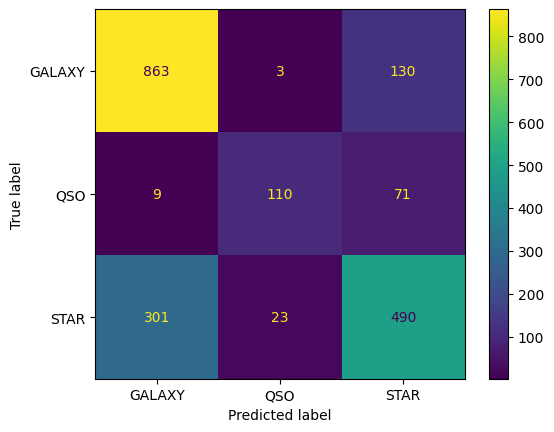

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred = nn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_classes, target_names=encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes, display_labels=encoder.classes_)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

##**Comparative Histograms:**
We can visualize the distribution of predicted classes compared to the original data using histograms.

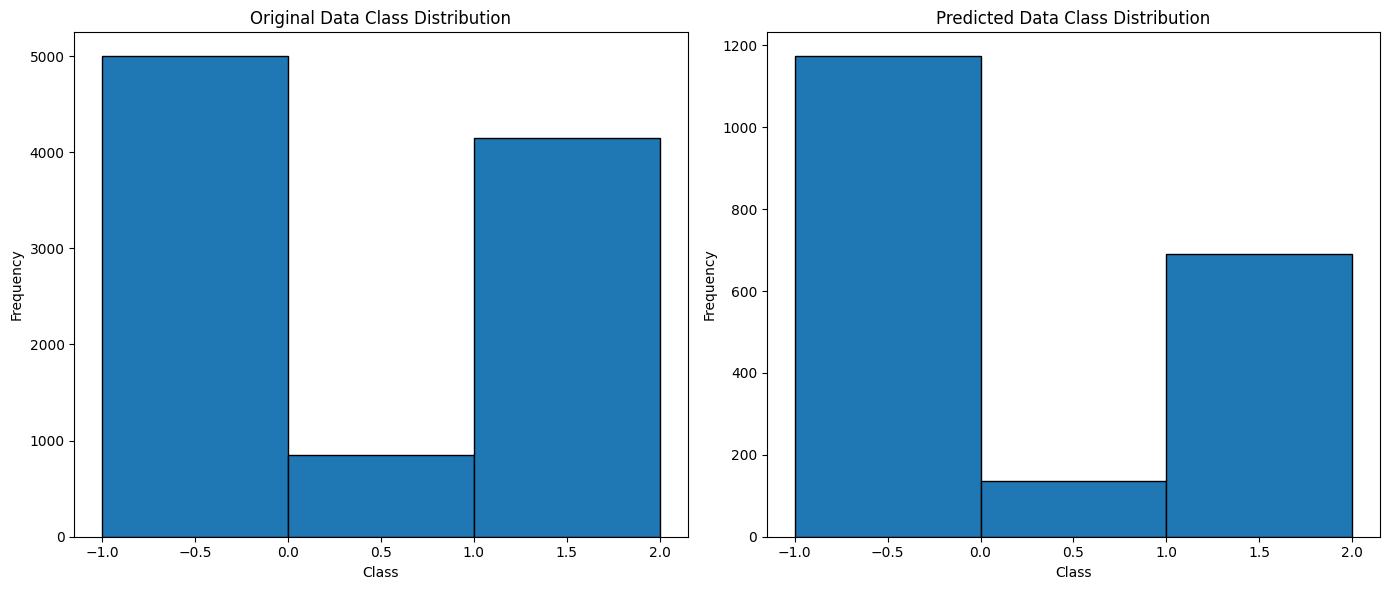

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Comparative histograms
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original Data Distribution
axes[0].hist(y, bins=np.arange(len(np.unique(y)) + 1) - 0.5, edgecolor='black', align='left') # Use np.unique() instead of y.unique()
axes[0].set_title("Original Data Class Distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")

# Predicted Data Distribution
axes[1].hist(y_pred_classes, bins=np.arange(len(np.unique(y_pred_classes)) + 1) - 0.5, edgecolor='black', align='left') # Use y_pred_classes instead of y_pred
axes[1].set_title("Predicted Data Class Distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


## **Model Optimization (Optional):**

## **Hyperparameter Tuning:**
You can experiment with different hyperparameters like the number of layers, neurons, activation functions, and dropout rates to improve the model's performance. Grid search or random search can be used for this purpose.

## **Early Stopping:**
Early stopping can be used to prevent overfitting by stopping the training process when the validation loss stops improving.

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

## **Learning Rate Scheduling:**
We'll use LearningRateScheduler to adjust the learning rate during training. This can help the model converge faster and find a better solution.

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler

def learning_rate_schedule(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * np.exp(0.1 * (10 - epoch))

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

## **Training the Optimized Model:**
Now, let's train the model with early stopping and learning rate scheduling.

In [ ]:
# Train the optimized model
history_optimized = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping, lr_scheduler]
)
print("Optimized model training completed.")

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7062 - loss: 0.6412 - val_accuracy: 0.7100 - val_loss: 0.6273 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7035 - loss: 0.6452 - val_accuracy: 0.7294 - val_loss: 0.5869 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7167 - loss: 0.6285 - val_accuracy: 0.7406 - val_loss: 0.6004 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.6402 - val_accuracy: 0.7287 - val_loss: 0.5784 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7072 - loss: 0.6406 - val_accuracy: 0.7419 - val_loss: 0.5832 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7094 - loss: 0.6346 - val_accuracy: 0.7294 - val_loss: 0.6192 - learning_rate: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7050 - loss: 0.6466 - 

## **Evaluating and Visualizing the Optimized Model:**

## **Model Evaluation:**

We evaluate the optimized model on the testing data to assess its performance on unseen data.

In [ ]:
# Evaluate the optimized model
loss_optimized, accuracy_optimized = model.evaluate(X_test, y_test, verbose=0)
print(f"Optimized Test Loss: {loss_optimized:.4f}")
print(f"Optimized Test Accuracy: {accuracy_optimized:.4f}")

Optimized Test Loss: 0.5909
Optimized Test Accuracy: 0.7245


## **Visualization:**

## **Comparative Histograms:**
We can visualize the distribution of predicted classes compared to the original data using histograms.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step


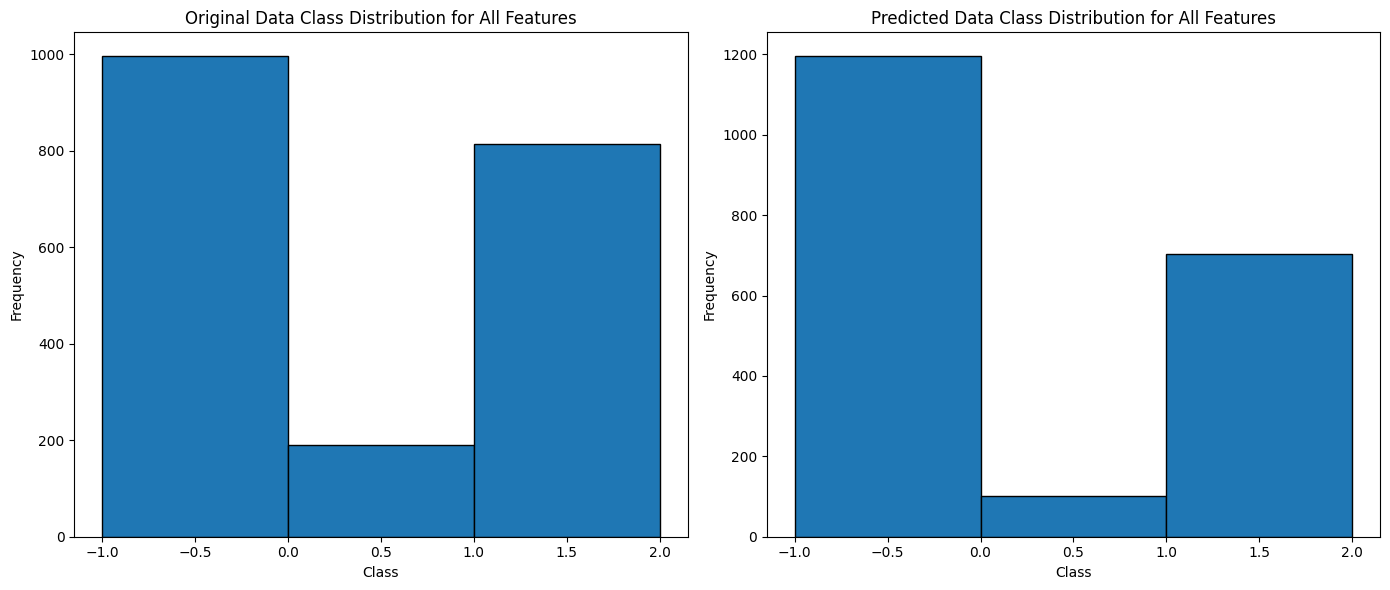

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparative_histograms(feature_name, original_data, predicted_data, original_labels, predicted_labels):
    """
    Plots comparative histograms for original and predicted data distributions.

    Args:
        feature_name (str): Name of the feature being plotted.
        original_data (pd.Series or np.array): Original data for the feature.
        predicted_data (pd.Series or np.array): Predicted data for the feature.
        original_labels (pd.Series or np.array): Original class labels.
        predicted_labels (pd.Series or np.array): Predicted class labels.
    """
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Original Data Distribution
    axes[0].hist(original_labels, bins=np.arange(len(np.unique(original_labels)) + 1) - 0.5, edgecolor='black', align='left')
    axes[0].set_title(f"Original Data Class Distribution for {feature_name}")
    axes[0].set_xlabel("Class")
    axes[0].set_ylabel("Frequency")

    # Predicted Data Distribution
    axes[1].hist(predicted_labels, bins=np.arange(len(np.unique(predicted_labels)) + 1) - 0.5, edgecolor='black', align='left')
    axes[1].set_title(f"Predicted Data Class Distribution for {feature_name}")
    axes[1].set_xlabel("Class")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# ... (your existing code) ...

# Make predictions with the optimized model
y_pred_optimized = model.predict(X_test)
y_pred_classes_optimized = np.argmax(y_pred_optimized, axis=1)  # Get predicted class labels

# Call the function to plot the histograms
plot_comparative_histograms('All Features', X_test['ra'], X_test['ra'], y_test, y_pred_classes_optimized)

## **Confusion Matrix:**
We can visualize the performance of the optimized model using a confusion matrix.

              precision    recall  f1-score   support

      GALAXY       0.73      0.88      0.80       996
         QSO       0.87      0.46      0.60       190
        STAR       0.69      0.60      0.64       814

    accuracy                           0.72      2000
   macro avg       0.77      0.65      0.68      2000
weighted avg       0.73      0.72      0.72      2000



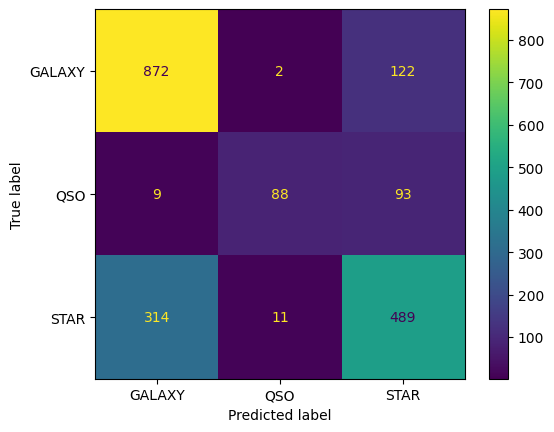

In [ ]:
# Print classification report and confusion matrix for the optimized model
print(classification_report(y_test, y_pred_classes_optimized, target_names=encoder.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_classes_optimized, display_labels=encoder.classes_)
plt.show()

## **10. Conclusion:**
This notebook demonstrates the process of building, training, and evaluating a neural network model for classifying astronomical objects. We explored data preprocessing, model building, training, evaluation, visualization, and potential optimization techniques.

Further exploration can involve experimenting with different model architectures, hyperparameters, and optimization techniques to achieve better performance.